In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import pickle

In [2]:
x_train=np.loadtxt("../train_test_set/x_side_train.txt")
x_test= np.loadtxt("../train_test_set/x_side_test.txt")

In [3]:
with open("../train_test_set/y_side_train.txt", "r") as fp:
    y_train = [x[:-1] for x in fp.readlines()]
with open("../train_test_set/y_side_test.txt", "r") as fp:
    y_test = [x[:-1] for x in fp.readlines()]

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')
model.fit(x_train, y_train)
# make predictions
model.score(x_test,y_test)

0.8033240997229917

In [5]:
from sklearn.ensemble import RandomForestClassifier
rFor = RandomForestClassifier(max_depth=1, random_state=30)
rFor.fit(x_train, y_train)
rFor.score(x_test,y_test)

0.9307479224376731

In [6]:
np.nonzero(rFor.feature_importances_)#elbow, shoulder, shoulder, wrist, midhip, hip, knee, eye

(array([ 3,  5,  6, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 40,
        42]),)

In [9]:
# save the model to disk
filename = 'side_random_forest_model.sav'
pickle.dump(rFor, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9307479224376731


Normalized confusion matrix
[[0.90875912 0.09124088]
 [0.         1.        ]]


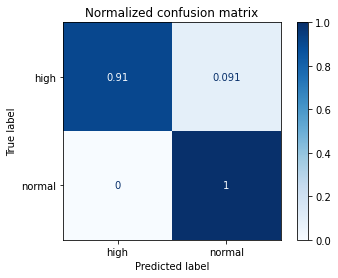

In [7]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Plot non-normalized confusion matrix
titles_options = [("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rFor, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()
#plt.savefig('confusion_matrix_side_randomFor.png')

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0).fit(x_train, y_train)
log_reg.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8642659279778393

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train)
neigh.score(x_test,y_test)

0.6814404432132964

In [21]:
from sklearn import svm
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(x_train, y_train)
clf_svc.score(x_test,y_test)

0.8448753462603878

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gBoost = GradientBoostingClassifier(random_state=0)
gBoost.fit(x_train, y_train)
gBoost.score(x_test, y_test)

0.9141274238227147

In [1]:
import sklearn

In [2]:
sklearn.__version__

'0.23.1'